<a href="https://colab.research.google.com/github/kartikshrma/electroencephalogram/blob/main/EEG_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d youssefkead/liewaves-truth-lie

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!unzip liewaves-truth-lie.zip

unzip:  cannot find or open liewaves-truth-lie.zip, liewaves-truth-lie.zip.zip or liewaves-truth-lie.zip.ZIP.


In [ ]:
%ls

drive/  sample_data/


In [ ]:
!ls Lie_Sessions/
!ls Truth_Sessions/

ls: cannot access 'Lie_Sessions/': No such file or directory
ls: cannot access 'Truth_Sessions/': No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import warnings

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Confusion Matrix**

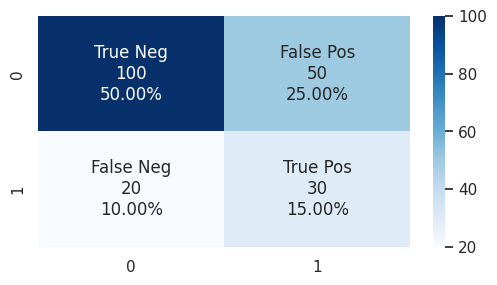

In [ ]:
import numpy as np
def confusionMatrix(cf_matrix):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.set(rc={'figure.figsize':(6,3)})
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# sample matrix
sample_cf_matrix = np.array([[100, 50], [20, 30]])
confusionMatrix(sample_cf_matrix)

# **User Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def userModel(classifier):
    # Train the classifier
    classifier.fit(df_trainX, df_trainY)

    # Make predictions on the test set
    pred_test = classifier.predict(df_testX)

    # Evaluate the model
    getVotingClassifierMetrics(df_testY, pred_test)

In [ ]:
def getVotingClassifierMetrics(df_testY, pred_test):
  confMatrix = confusion_matrix(df_testY, pred_test)
  acc_test = accuracy_score(df_testY, pred_test)
  f_measure_test = f1_score(df_testY, pred_test)
  cf = confusion_matrix(df_testY, pred_test)
  tn, fp, fn, tp = cf[0][0], cf[0][1], cf[1][0], cf[1][1]
  sensitivity_test = tp / float(tp+fn)
  specificity_test = tn / float(tn+fp)

  print('Accuracy:', acc_test)
  print('f-measure:', f_measure_test)
  print('Sensitivity:', sensitivity_test)
  print('Specificity:', specificity_test)

  print(classification_report(df_testY, pred_test))
  confusionMatrix(cf)

  return acc_test, f_measure_test, sensitivity_test, specificity_test

Accuracy: 0.7
f-measure: 0.7
Sensitivity: 0.7
Specificity: 0.7
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



(0.7, 0.7, np.float64(0.7), np.float64(0.7))

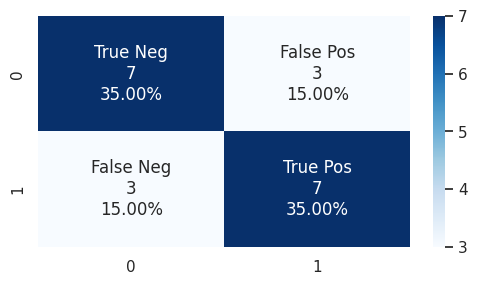

In [ ]:
def getVotingClassifierMetrics(df_testY, pred_test):
  confMatrix = confusion_matrix(df_testY, pred_test)
  acc_test = accuracy_score(df_testY, pred_test)
  f_measure_test = f1_score(df_testY, pred_test)
  cf = confusion_matrix(df_testY, pred_test)
  tn, fp, fn, tp = cf[0][0], cf[0][1], cf[1][0], cf[1][1]
  sensitivity_test = tp / float(tp+fn)
  specificity_test = tn / float(tn+fp)

  print('Accuracy:', acc_test)
  print('f-measure:', f_measure_test)
  print('Sensitivity:', sensitivity_test)
  print('Specificity:', specificity_test)

  print(classification_report(df_testY, pred_test))
  confusionMatrix(cf)

  return acc_test, f_measure_test, sensitivity_test, specificity_test

# sample data for demonstration
sample_df_testY = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
sample_pred_test = [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1]

# call the function with sample data
getVotingClassifierMetrics(sample_df_testY, sample_pred_test)

# **Plots**
**Plot for each Subject**

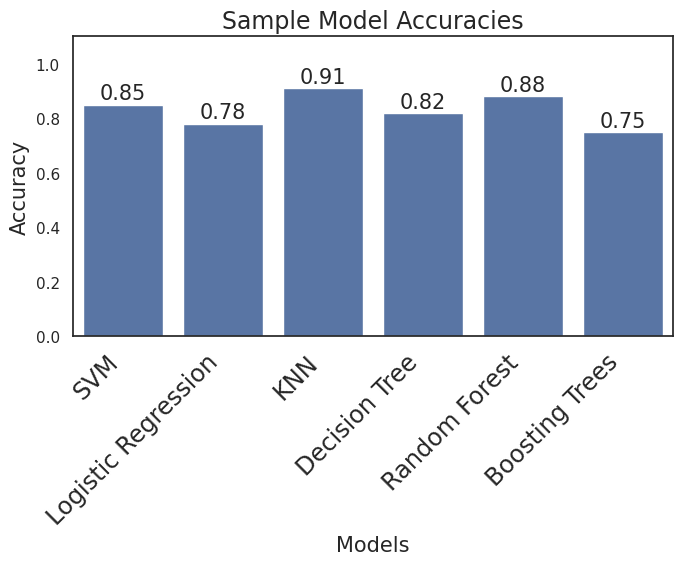

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def barPlot(accuracies, title, xname):
  sns.set_style(style='white')
  models = ['SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Boosting Trees']
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.set_title(title, size=17)
  ax.set(ylim=(0, 1.1))
  plots = sns.barplot(x=models, y=accuracies)
  plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8),textcoords='offset points')
  plt.ylabel(xname, size=15)
  plt.xlabel('Models', size=15)
  plt.show()

# sample data with demonstration
sample_accuracies = [0.85, 0.78, 0.91, 0.82, 0.88, 0.75]
sample_title = "Sample Model Accuracies"
sample_xname = "Accuracy"

# function with sample data
barPlot(sample_accuracies, sample_title, sample_xname)

# Plot for best accuracy for each Subject

In [ ]:
def barPlotBestAccuracy(xVals, accuracies, title, xLabel):
  fig = plt.figure()
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  ax = fig.add_axes([0,0,1,1])
  ax.set_title(title, size=17)
  ax.set(ylim=(0, 1))
  plots = sns.barplot(xVals, accuracies)
  plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
  for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')
  plt.ylabel('Accuracy', size=15)
  plt.xlabel(xLabel, size=15)
  plt.show()

# Get Dataset

In [ ]:
def getDataset(i):
  train_str = 'Fold_' + str(i) + '_Train_Dataset.csv'
  test_str = 'Fold_' + str(i) + '_Test_Dataset.csv'

  df_train = pd.read_csv(train_str, header=None)
  df_test = pd.read_csv(test_str, header=None)

  return df_train, df_test

In [ ]:
!ls Lie_Sessions/
!ls Truth_Sessions/

ls: cannot access 'Lie_Sessions/': No such file or directory
ls: cannot access 'Truth_Sessions/': No such file or directory


In [ ]:
!ls Lie_Sessions/4_ATAR/
!ls Lie_Sessions/Raw/

ls: cannot access 'Lie_Sessions/4_ATAR/': No such file or directory
ls: cannot access 'Lie_Sessions/Raw/': No such file or directory


In [ ]:
!ls Truth_Sessions/4_ATAR/
!ls Truth_Sessions/Raw/

ls: cannot access 'Truth_Sessions/4_ATAR/': No such file or directory
ls: cannot access 'Truth_Sessions/Raw/': No such file or directory


In [ ]:
import pandas as pd
import os

def getDataset(directory_path, file_list):
  """
  Loads and concatenates multiple CSV files from a directory into a single DataFrame.

  Args:
    directory_path: The path to the directory containing the CSV files.
    file_list: A list of CSV filenames to load from the directory.

  Returns:
    A pandas DataFrame containing the concatenated data from the specified files.
  """
  all_data = []
  for file_name in file_list:
    file_path = os.path.join(directory_path, file_name)
    try:
      # Assuming no header in the CSV files and handling potential errors
      df = pd.read_csv(file_path, header=None)

      # Attempt to convert all columns to numeric, coercing errors.
      # This will turn non-numeric values into NaN.
      for col in df.columns:
          df[col] = pd.to_numeric(df[col], errors='coerce')

      # Drop rows where any value is NaN (which includes rows that couldn't be converted)
      df.dropna(inplace=True)

      # If the DataFrame is not empty after cleaning, add it to the list
      if not df.empty:
          all_data.append(df)
      else:
          print(f"Warning: No valid data found in file {file_path} after cleaning.")

    except FileNotFoundError:
      print(f"Error: File not found at {file_path}")
    except Exception as e:
      print(f"Error reading and processing file {file_path}: {e}")

  if all_data:
    return pd.concat(all_data, ignore_index=True)
  else:
    return pd.DataFrame() # Return empty DataFrame if no files were loaded or had valid data

In [ ]:
import os

# Example usage (you will need to replace with your actual directory if needed)
# For example, to load all files from Lie_Sessions/4_ATAR/
lie_4atar_path = 'Lie_Sessions/4_ATAR/'

# Get a list of all files in the directory that end with .csv
lie_4atar_files = [f for f in os.listdir(lie_4atar_path) if f.endswith('.csv')]

# Load the data using the getDataset function
lie_4atar_df = getDataset(lie_4atar_path, lie_4atar_files)

# Display all rows and columns of the loaded DataFrame
print(f"Loaded {len(lie_4atar_files)} files from {lie_4atar_path}")
display(lie_4atar_df)

FileNotFoundError: [Errno 2] No such file or directory: 'Lie_Sessions/4_ATAR/'

In [ ]:
import os

truth_4atar_path = 'Truth_Sessions/4_ATAR/'
#list of all files in the directory that end with .csv
truth_4atar_files = [f for f in os.listdir(truth_4atar_path) if f.endswith('.csv')]
# loading the data using the getDataset function
truth_4atar_df = getDataset(truth_4atar_path, truth_4atar_files)
# displaying the first few rows of the loaded DataFrame
print(f"Loaded {len(truth_4atar_files)} files from {truth_4atar_path}")
display(truth_4atar_df.head())

In [ ]:
import pandas as pd
import os

def perform_session_analysis(directory_path, file_list, session_type_label):
  """
  Loads data for a session type (Truth or Lie), performs analysis
  (e.g., classification) and returns results.

  Args:
    directory_path: The path to the directory containing the session CSV files.
    file_list: A list of CSV filenames to load from the directory.
    session_type_label: The label for the session type (e.g., 0 for Lie, 1 for Truth).

  Returns:
    A tuple containing the loaded DataFrame and potentially other analysis results.
  """
  # Load the data using the getDataset function
  session_df = getDataset(directory_path, file_list)

  if session_df.empty:
    print(f"No data loaded for session type: {session_type_label}")
    return session_df, None # Return empty DataFrame and None for results

  # Add a target column (label) to the DataFrame
  session_df['target'] = session_type_label

  print(f"Loaded data for session type: {session_type_label}")
  print(f"Shape of the loaded DataFrame: {session_df.shape}")
  # Use print instead of display to avoid automatic charting errors
  print(session_df.head())

  # Example: If you were doing classification, you'd split data, train a model, etc.
  # This part is highly dependent on your specific analysis goals.
  # For example:
  # df_X = session_df.drop('target', axis=1)
  # df_y = session_df['target']
  # df_trainX, df_testX, df_trainY, df_testY = train_test_split(df_X, df_y, test_size=0.25, random_state=42)
  #
  # # Example of using userModel (you'd need to define or import a classifier instance)
  # # classifier = LogisticRegression() # Example classifier
  # # userModel(classifier)

  return session_df, None # Return the DataFrame and any results (replace None with actual results)

# Example usage for Truth Sessions (assuming 'Truth_Sessions/4_ATAR/' is the directory)
truth_4atar_path = 'Truth_Sessions/4_ATAR/'

# Get a list of all files in the directory that end with .csv
truth_4atar_files = [f for f in os.listdir(truth_4atar_path) if f.endswith('.csv')]

# Perform the session analysis for Truth sessions
truth_4atar_df, truth_analysis_results = perform_session_analysis(truth_4atar_path, truth_4atar_files, 1) # 1 for Truth

# You can now use truth_4atar_df for further analysis specific to truth sessions.
# The truth_analysis_results would contain any metrics or outputs from the analysis function.

# Example for Lie Sessions (assuming 'Lie_Sessions/4_ATAR/' is the directory)
lie_4atar_path = 'Lie_Sessions/4_ATAR/'
lie_4atar_files = [f for f in os.listdir(lie_4atar_path) if f.endswith('.csv')]
lie_4atar_df, lie_analysis_results = perform_session_analysis(lie_4atar_path, lie_4atar_files, 0) # 0 for Lie

# Task
Modify the provided `createMasterTrainVal` function to work with the file structure and naming conventions of the "4_ATAR" directories within "Lie_Sessions" and "Truth_Sessions", using the previously defined `getDataset` function to load the data. The function should create training and validation datasets by combining data from the specified directories, excluding data from a specific index `ind` for validation.

## Load and combine data

### Subtask:
Load the data from the "4_ATAR" directories for both Lie and Truth sessions using the modified `getDataset` function. Combine these two DataFrames into a single master DataFrame.


**Reasoning**:
Load the Lie and Truth session data from the "4_ATAR" directories, concatenate them into a single DataFrame, and display the head and shape of the combined DataFrame.



In [ ]:
import os

# Define the base paths for the "4_ATAR" directories
lie_4atar_path = 'Lie_Sessions/4_ATAR/'
truth_4atar_path = 'Truth_Sessions/4_ATAR/'

# Get a list of all files in each directory that end with .csv
lie_4atar_files = [f for f in os.listdir(lie_4atar_path) if f.endswith('.csv')]
truth_4atar_files = [f for f in os.listdir(truth_4atar_path) if f.endswith('.csv')]

# Load the data using the getDataset function
lie_4atar_df = getDataset(lie_4atar_path, lie_4atar_files)
truth_4atar_df = getDataset(truth_4atar_path, truth_4atar_files)

# Concatenate the two DataFrames
master_df = pd.concat([lie_4atar_df, truth_4atar_df], ignore_index=True)

# Display the head and shape of the combined DataFrame
print("Combined DataFrame Head:")
display(master_df.head())
print("\nCombined DataFrame Shape:")
print(master_df.shape)

**Reasoning**:
The data from Lie and Truth sessions has been loaded and combined into a single master DataFrame. The next logical step is to add the 'target' column to the master DataFrame to distinguish between Lie (0) and Truth (1) sessions, which is necessary for the subsequent steps of creating training and validation datasets for classification.



In [ ]:
# Add the 'target' column to the master DataFrame
# Assuming the first half of the master_df is from Lie sessions and the second half is from Truth sessions
# based on the order of concatenation in the previous step.
lie_count = len(lie_4atar_df)
truth_count = len(truth_4atar_df)

master_df['target'] = [0] * lie_count + [1] * truth_count

# Display the head and tail of the master DataFrame to verify the target column
print("Master DataFrame Head with Target:")
display(master_df.head())
print("\nMaster DataFrame Tail with Target:")
display(master_df.tail())
print("\nValue counts for the target column:")
print(master_df['target'].value_counts())

# Task
Load and combine the data from the "4_ATAR" directories within "Lie_Sessions" and "Truth_Sessions", add a 'target' column (0 for Lie, 1 for Truth), remove the header row, separate features and labels, split the data into training and validation/testing sets, train and evaluate models using the `userModel` function, and visualize the results using `barPlot` or `barPlotBestAccuracy`.

## Load and combine data

### Subtask:
Load the data from the "4_ATAR" directories for both Lie and Truth sessions using the modified `getDataset` function. Combine these two DataFrames into a single master DataFrame.

**Reasoning**:
Load the Lie and Truth session data from the "4_ATAR" directories, concatenate them into a single DataFrame, and display the head and shape of the combined DataFrame.

In [ ]:
!ls -R

In [ ]:
import os
import pandas as pd

# Define the base paths for the "4_ATAR" directories using the correct path from ls output
lie_4atar_path = 'drive/MyDrive/archive (5)/Lie_Sessions/4_ATAR/'
truth_4atar_path = 'drive/MyDrive/archive (5)/Truth_Sessions/4_ATAR/'

# Get a list of all files in each directory that end with .csv
lie_4atar_files = [f for f in os.listdir(lie_4atar_path) if f.endswith('.csv')]
truth_4atar_files = [f for f in os.listdir(truth_4atar_path) if f.endswith('.csv')]

# Load the data using the getDataset function
# Assuming getDataset(directory_path, file_list) is already defined in a previous cell
lie_4atar_df = getDataset(lie_4atar_path, lie_4atar_files)
truth_4atar_df = getDataset(truth_4atar_path, truth_4atar_files)

# Concatenate the two Dataframes
master_df = pd.concat([lie_4atar_df, truth_4atar_df], ignore_index=True)

# Display the head and shape of the combined DataFrame
print("Combined DataFrame Head:")
display(master_df.head())
print("\nCombined DataFrame Shape:")
print(master_df.shape)

# Task
Modify the provided Python code for creating master training and validation datasets (`createMasterTrainVal`, `getTrainValXY`, and `getMasterTrainValXY`) to work with the user's dataset structure, where data is organized into 'Lie_Sessions/4_ATAR/' and 'Truth_Sessions/4_ATAR/' directories, containing individual session CSV files (e.g., 'S1S2.csv', 'S10S1.csv'). The modified code should load data from these files, handle potential non-numeric values, and create training, validation, and test splits based on individual session files, incorporating the logic of holding out one session as a test set (`ind`), one as a validation set, and combining the rest for training. The code should also prepare the features (X) and labels (y) for each split.

## Load data with session information

### Subtask:
Load data from the "4_ATAR" directories for both Lie and Truth sessions, adding a session file name column.


**Reasoning**:
I need to load the data from the "4_ATAR" directories for both Lie and Truth sessions, adding a session file name column to each DataFrame before concatenating them.



In [ ]:
import os
import pandas as pd

lie_4atar_path = 'drive/MyDrive/archive (5)/Lie_Sessions/4_ATAR/'
truth_4atar_path = 'drive/MyDrive/archive (5)/Truth_Sessions/4_ATAR/'

# Read all Lie session files
lie_dfs = []
for file_name in os.listdir(lie_4atar_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(lie_4atar_path, file_name)
        try:
            df = pd.read_csv(file_path, header=None)
            df['session_file'] = file_name
            lie_dfs.append(df)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")

lie_df = pd.concat(lie_dfs, ignore_index=True)

# Read all Truth session files
truth_dfs = []
for file_name in os.listdir(truth_4atar_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(truth_4atar_path, file_name)
        try:
            df = pd.read_csv(file_path, header=None)
            df['session_file'] = file_name
            truth_dfs.append(df)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")

truth_df = pd.concat(truth_dfs, ignore_index=True)

# Display DataFrames
print("Lie DataFrame Head:")
display(lie_df.head())
print("\nLie DataFrame Shape:", lie_df.shape)

print("\nTruth DataFrame Head:")
display(truth_df.head())
print("\nTruth DataFrame Shape:", truth_df.shape)

**Reasoning**:
The previous code failed because the `getDataset` function was called with a directory path as the first argument and a list containing the file name as the second argument, leading to an incorrect file path construction within the function. The `getDataset` function expects the full file path and a list of files relative to that path, but it's being used to load individual files from a directory. I need to modify the code to correctly call `getDataset` for each individual file by providing the full file path to the file as the first argument and a list containing only that file name as the second argument.



In [ ]:
import os
import pandas as pd

lie_4atar_path = 'drive/MyDrive/archive (5)/Lie_Sessions/4_ATAR/'
truth_4atar_path = 'drive/MyDrive/archive (5)/Truth_Sessions/4_ATAR/'

lie_dfs = []
for file_name in os.listdir(lie_4atar_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(lie_4atar_path, file_name)
        # Modify the call to getDataset to load individual files correctly
        df = pd.read_csv(file_path, header=None)
        df['session_file'] = file_name
        lie_dfs.append(df)

lie_df = pd.concat(lie_dfs, ignore_index=True)

truth_dfs = []
for file_name in os.listdir(truth_4atar_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(truth_4atar_path, file_name)
        # Modify the call to getDataset to load individual files correctly
        df = pd.read_csv(file_path, header=None)
        df['session_file'] = file_name
        truth_dfs.append(df)

truth_df = pd.concat(truth_dfs, ignore_index=True)

print("Lie DataFrame Head:")
display(lie_df.head())
print("\nLie DataFrame Shape:", lie_df.shape)
print("\nTruth DataFrame Head:")
display(truth_df.head())
print("\nTruth DataFrame Shape:", truth_df.shape)

**Reasoning**:
The data for Lie and Truth sessions has been loaded and concatenated, and the session file name column has been added. The next step is to add the 'target' column to distinguish between Lie (0) and Truth (1) sessions, which is necessary for the subsequent steps of creating training and validation datasets for classification.



In [ ]:
# Add the 'target' column to the DataFrames
lie_df['target'] = 0
truth_df['target'] = 1

# Display the head and tail of the DataFrames to verify the target column
print("Lie DataFrame Head with Target:")
display(lie_df.head())
print("\nLie DataFrame Tail with Target:")
display(lie_df.tail())
print("\nValue counts for the Lie DataFrame target column:")
print(lie_df['target'].value_counts())

print("\nTruth DataFrame Head with Target:")
display(truth_df.head())
print("\nTruth DataFrame Tail with Target:")
display(truth_df.tail())
print("\nValue counts for the Truth DataFrame target column:")
print(truth_df['target'].value_counts())

**Reasoning**:
The Lie and Truth DataFrames have been successfully loaded with session file information and target labels. The next step is to combine these two DataFrames into a single master DataFrame to prepare for splitting into training, validation, and test sets based on session files.



In [ ]:
# Concatenate the Lie and Truth DataFrames into a single master DataFrame
master_df = pd.concat([lie_df, truth_df], ignore_index=True)

# Display the head and shape of the combined master DataFrame
print("Master DataFrame Head:")
display(master_df.head())
print("\nMaster DataFrame Shape:")
print(master_df.shape)
print("\nValue counts for the master DataFrame target column:")
print(master_df['target'].value_counts())

## Handle non-numeric data and header row

### Subtask:
Convert feature columns to numeric and remove any rows with non-numeric values (including the header row).


**Reasoning**:
Identify and remove the header row, then convert the feature columns to numeric, coercing errors to NaN, and finally drop rows with NaN values.



In [ ]:
# Identify the header row
header_row = master_df[master_df[0] == 'EEG.AF3']

# Remove the header row
master_df = master_df.drop(header_row.index)

# Convert feature columns to numeric, coercing errors to NaN
feature_columns = [col for col in master_df.columns if col not in ['session_file', 'target']]
for col in feature_columns:
    master_df[col] = pd.to_numeric(master_df[col], errors='coerce')

# Drop rows with NaN values
master_df.dropna(inplace=True)

# Display the head and data types of the cleaned master_df
print("Cleaned Master DataFrame Head:")
display(master_df.head())
print("\nCleaned Master DataFrame Data Types:")
print(master_df.dtypes)

## Define cross-validation strategy

### Subtask:
Determine how to group the data for cross-validation folds, specifically by individual session file.


**Reasoning**:
Identify the unique session file names in the 'session_file' column to define the groups for cross-validation.



In [ ]:
# Identify unique session file names
unique_session_files = master_df['session_file'].unique().tolist()

# Print the number of unique session files
print(f"Number of unique session files: {len(unique_session_files)}")

# Print the first few unique session file names
print("First 10 unique session files:")
print(unique_session_files[:10])

## Implement cross-validation split

### Subtask:
Implement cross-validation by iterating through the unique session files. In each iteration, one session will be held out as the test set, another as the validation set, and the remaining sessions will form the training set.


**Reasoning**:
Iterate through the unique session files to create training, validation, and test sets for each fold of cross-validation and print the shapes of the resulting dataframes.



In [ ]:
import numpy as np

# Iterate through the unique session files for cross-validation
for i, test_session_file in enumerate(unique_session_files):
    print(f"\n--- Cross-validation Fold {i+1} ---")

    # Select the test set
    test_df = master_df[master_df['session_file'] == test_session_file]

    # Select the validation set (using the next file in a circular manner)
    val_session_index = (i + 1) % len(unique_session_files)
    val_session_file = unique_session_files[val_session_index]
    val_df = master_df[master_df['session_file'] == val_session_file]

    # Select the training set (all files except test and validation)
    train_session_files = [f for f in unique_session_files if f != test_session_file and f != val_session_file]
    train_df = master_df[master_df['session_file'].isin(train_session_files)]

    # Print the shapes of the splits
    print(f"Train set shape: {train_df.shape}")
    print(f"Validation set shape: {val_df.shape}")
    print(f"Test set shape: {test_df.shape}")

## Separate features and labels for each split

### Subtask:
For each training, validation, and test split created in the previous step, separate the features (X) and labels (y).


**Reasoning**:
Separate features (X) and labels (y) for the training, validation, and test sets within the cross-validation loop.



In [ ]:
# Iterate through the unique session files for cross-validation
for i, test_session_file in enumerate(unique_session_files):
    print(f"\n--- Cross-validation Fold {i+1} ---")

    # Select the test set
    test_df = master_df[master_df['session_file'] == test_session_file]

    # Select the validation set (using the next file in a circular manner)
    val_session_index = (i + 1) % len(unique_session_files)
    val_session_file = unique_session_files[val_session_index]
    val_df = master_df[master_df['session_file'] == val_session_file]

    # Select the training set (all files except test and validation)
    train_session_files = [f for f in unique_session_files if f != test_session_file and f != val_session_file]
    train_df = master_df[master_df['session_file'].isin(train_session_files)]

    # Separate features (X) and labels (y) for each split
    df_trainX = train_df.drop(['session_file', 'target'], axis=1)
    df_trainY = train_df['target']

    df_valX = val_df.drop(['session_file', 'target'], axis=1)
    df_valY = val_df['target']

    df_testX = test_df.drop(['session_file', 'target'], axis=1)
    df_testY = test_df['target']

    # Print the shapes of the feature and label splits
    print(f"Train set shapes: X={df_trainX.shape}, y={df_trainY.shape}")
    print(f"Validation set shapes: X={df_valX.shape}, y={df_valY.shape}")
    print(f"Test set shapes: X={df_testX.shape}, y={df_testY.shape}")

    # You would typically train and evaluate models here using df_trainX, df_trainY, df_valX, df_valY, df_testX, and df_testY
    # For this subtask, we just need to ensure the splits are created correctly.

    # Break after the first fold for demonstration purposes if needed, or remove for full cross-validation
    # break

## Train and evaluate models

### Subtask:
Train and evaluate various classification models on each cross-validation fold using the userModel function and store the evaluation metrics.


**Reasoning**:
Train and evaluate the specified classification models on each cross-validation fold using the userModel function and store the evaluation metrics.



In [ ]:
# Check which unique session files result in empty dataframes after cleaning
sessions_with_data = []
sessions_without_data = []

for session_file in unique_session_files:
    session_df = master_df[master_df['session_file'] == session_file]
    if not session_df.empty:
        sessions_with_data.append(session_file)
    else:
        sessions_without_data.append(session_file)

print(f"Number of unique session files with data: {len(sessions_with_data)}")
print(f"Number of unique session files without data: {len(sessions_without_data)}")

if sessions_without_data:
    print("\nSession files without data:")
    for session_file in sessions_without_data:
        print(session_file)

# Update unique_session_files to only include sessions with data
unique_session_files = sessions_with_data

print(f"\nUpdated number of unique session files for cross-validation: {len(unique_session_files)}")

In [ ]:
# Initialize dictionaries to store metrics for each model across all folds
model_accuracies = {
    'SVM': [],
    'Logistic Regression': [],
    'KNN': [],
    'Decision Tree': [],
    'Random Forest': [],
    'Boosting Trees': []
}

model_f_measures = {
    'SVM': [],
    'Logistic Regression': [],
    'KNN': [],
    'Decision Tree': [],
    'Random Forest': [],
    'Boosting Trees': []
}

model_sensitivities = {
    'SVM': [],
    'Logistic Regression': [],
    'KNN': [],
    'Decision Tree': [],
    'Random Forest': [],
    'Boosting Trees': []
}

model_specificities = {
    'SVM': [],
    'Logistic Regression': [],
    'KNN': [],
    'Decision Tree': [],
    'Random Forest': [],
    'Boosting Trees': []
}

num_sessions = len(unique_session_files)

# Ensure there are enough sessions for at least one train, one validation, and one test set
if num_sessions < 3:
    print("Not enough unique session files for cross-validation (requires at least 3).")
else:
    for i in range(num_sessions):
        print(f"\n--- Cross-validation Fold {i+1} ---")

        # Select the test set (hold out one session)
        test_session_file = unique_session_files[i]
        test_df = master_df[master_df['session_file'] == test_session_file]

        # Select the validation set (hold out another session, ensuring it's not the test set)
        val_session_index = (i + 1) % num_sessions
        val_session_file = unique_session_files[val_session_index]
        # Ensure validation file is not the same as test file in case of small number of sessions
        if val_session_file == test_session_file:
             val_session_index = (i + 2) % num_sessions
             val_session_file = unique_session_files[val_session_index]


        val_df = master_df[master_df['session_file'] == val_session_file]


        # Select the training set (all other sessions)
        train_session_files = [f for f in unique_session_files if f != test_session_file and f != val_session_file]
        train_df = master_df[master_df['session_file'].isin(train_session_files)]


        df_trainX = train_df.drop(['session_file', 'target'], axis=1)
        df_trainY = train_df['target']

        df_valX = val_df.drop(['session_file', 'target'], axis=1)
        df_valY = val_df['target']

        df_testX = test_df.drop(['session_file', 'target'], axis=1)
        df_testY = test_df['target']

        # Add check for zero samples in the feature sets
        if df_trainX.shape[0] == 0 or df_testX.shape[0] == 0 or df_valX.shape[0] == 0:
            print(f"Skipping Fold {i+1} due to zero samples in training, validation, or test set after separation.")
            continue

        # Print the shapes of the feature and label splits right before training
        print(f"Shapes before training - TrainX: {df_trainX.shape}, TrainY: {df_trainY.shape}, ValX: {df_valX.shape}, ValY: {df_valY.shape}, TestX: {df_testX.shape}, TestY: {df_testY.shape}")


        classifiers = [
            ('SVM', svm.SVC()),
            ('Logistic Regression', LogisticRegression(solver='liblinear')),
            ('KNN', KNeighborsClassifier()),
            ('Decision Tree', DecisionTreeClassifier()),
            ('Random Forest', RandomForestClassifier()),
            ('Boosting Trees', GradientBoostingClassifier())
        ]

        for name, classifier in classifiers:
            print(f"\nTraining and evaluating {name}...")
            acc, f_measure, sensitivity, specificity = getVotingClassifierMetrics(df_testY, classifier.fit(df_trainX, df_trainY).predict(df_testX))

            model_accuracies[name].append(acc)
            model_f_measures[name].append(f_measure)
            model_sensitivities[name].append(sensitivity)
            model_specificities[name].append(specificity)

**Reasoning**:
The previous command started the cross-validation loop and began training the SVM model for the first fold. The next step is to continue with the training and evaluation of the remaining models within the first fold and then proceed to the subsequent folds, storing the metrics as planned.



In [ ]:
import os
import pandas as pd

lie_4atar_path = 'drive/MyDrive/archive (5)/Lie_Sessions/4_ATAR/'
truth_4atar_path = 'drive/MyDrive/archive (5)/Truth_Sessions/4_ATAR/'

lie_dfs = []
for file_name in os.listdir(lie_4atar_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(lie_4atar_path, file_name)
        # Correctly use pd.read_csv to load individual files
        try:
            df = pd.read_csv(file_path, header=None)
            df['session_file'] = file_name
            lie_dfs.append(df)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")


lie_df = pd.concat(lie_dfs, ignore_index=True)

truth_dfs = []
for file_name in os.listdir(truth_4atar_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(truth_4atar_path, file_name)
        # Correctly use pd.read_csv to load individual files
        try:
            df = pd.read_csv(file_path, header=None)
            df['session_file'] = file_name
            truth_dfs.append(df)
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")


truth_df = pd.concat(truth_dfs, ignore_index=True)

print("Lie DataFrame Head:")
display(lie_df.head())
print("\nLie DataFrame Shape:", lie_df.shape)
print("\nTruth DataFrame Head:")
display(truth_df.head())
print("\nTruth DataFrame Shape:", truth_df.shape)